# 11.TEXT MINING-AMAZON_REVIEW


In [128]:
import pandas as pd
import requests
from tqdm import tqdm_notebook
from bs4 import BeautifulSoup
import re
from bs4 import BeautifulSoup as bs

In [129]:
headers = {
    'authority': 'www.amazon.in',
    'accept': 'text/html,application/xhtml+xml,application/xml;q=0.9,image/avif,image/webp,image/apng,*/*;q=0.8,application/signed-exchange;v=b3;q=0.9',
    'accept-language': 'en-US,en;q=0.9',
    'cache-control': 'max-age=0',
    # Requests sorts cookies= alphabetically
    # 'cookie': 'session-id=259-3113978-6678618; i18n-prefs=INR; ubid-acbin=260-8554202-6973909; lc-acbin=en_IN; csm-hit=tb:BS866TA0AKH6X86N924E+sa-7XYTQAXQHJP5ADH88228-DY27HYE0CK5V9FW24GBD|1656009294944&t:1656009294945&adb:adblk_yes; session-token=Z1j175VoYxPr2Un/9ciL3Q6lKw+QtLYYIwSQ+GLxjT06952u8vOZromD4WcFE0bs+yrUyLPy8HmIn7mTjUt8qsx3n0meC7yWKFqqwDEm5iecYedklsrNwmDrQOiaMH9lpacbdB8kgUk5IbZdg1VyhrdnY4OZrk6r350ARDEXJExuu2GZr0sV4fpbwUes/V9fDrfASeMQhVEEzmEAAHWN2g==; session-id-time=2082758401l',
    'device-memory': '8',
    'downlink': '10',
    'dpr': '0.8',
    'ect': '4g',
    'referer': 'https://www.amazon.in/OnePlus-Nord-Black-128GB-Storage/dp/B09WQY65HN/ref=sr_1_4?crid=1D99WHM86WX80&keywords=oneplus&qid=1656009113&sprefix=onep%2Caps%2C315&sr=8-4&th=1',
    'rtt': '0',
    'sec-ch-device-memory': '8',
    'sec-ch-dpr': '0.8',
    'sec-ch-ua': '" Not A;Brand";v="99", "Chromium";v="102", "Google Chrome";v="102"',
    'sec-ch-ua-mobile': '?0',
    'sec-ch-ua-platform': '"Windows"',
    'sec-ch-viewport-width': '2400',
    'sec-fetch-dest': 'document',
    'sec-fetch-mode': 'navigate',
    'sec-fetch-site': 'same-origin',
    'sec-fetch-user': '?1',
    'service-worker-navigation-preload': 'true',
    'upgrade-insecure-requests': '1',
    'user-agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/102.0.0.0 Safari/537.36',
    'viewport-width': '2400',
}

In [130]:
def get_soup(url):
    #r = requests.get('http://localhost:8050/render.html', 
    # Run this instead if you haven't setup Splash & Docker
    r = requests.get(url, headers=headers,
    params={'url': url, 'wait': 2})
    soup = BeautifulSoup(r.text, 'html.parser')
    return soup

In [131]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'product': soup.title.text.replace('Amazon.in:Customer reviews: ', '').strip(),    
            'date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            'title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'body': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [132]:
# Initialize list to store reviews data later on
reviewlist = []

# Function 2: look for web-tags in our soup, then append our data to reviewList
def get_reviews(soup):
    reviews = soup.find_all('div', {'data-hook': 'review'})
    try:
        for item in reviews:
            review = {
            'Rating':  float(item.find('i', {'data-hook': 'review-star-rating'}).text.replace('out of 5 stars', '').strip()),
            'Title': item.find('a', {'data-hook': 'review-title'}).text.strip(),
            'Review': item.find('span', {'data-hook': 'review-body'}).text.strip(),
            'Review_Date': item.find('span', {'data-hook': 'review-date'}).text.replace('Reviewed in India on', '').strip(),
            }
            reviewlist.append(review)
    except:
        pass

In [133]:
# loop through 1:x many pages, or until the css selector found only on the last page is found (when the next page button is greyed)
for x in tqdm_notebook(range(1,1000)):
    soup = get_soup(f'https://www.amazon.in/OnePlus-Nord-Mirror-128GB-Storage/product-reviews/B09RG132Q5/\
    ref=cm_cr_arp_d_paging_btm_next_2?ie=UTF8&reviewerType=all_reviews&pageNumber={x}')
    #print(f'Getting page: {x}')
    get_reviews(soup)
    #print(len(reviewlist))
    if not soup.find('li', {'class': 'a-disabled a-last'}):
        pass
    else:
        break

  0%|          | 0/999 [00:00<?, ?it/s]

In [134]:
df = pd.DataFrame(reviewlist)
df

,Rating,Title,Review,Review_Date
0,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,19 December 2022
1,4.0,A mildly perfect phone,I will try to keep this review short. This rev...,12 January 2023
2,4.0,Super product,This review is after using this phone for 2 mo...,3 June 2023
3,4.0,Battery,Battery is not upto the mark but due tofast ch...,3 June 2023
4,4.0,Good photo,Good,5 June 2023
...,...,...,...,...
4995,4.0,Slow work,Slow work mobile camera best battery slow,11 May 2022
4996,5.0,Awesome product,"Bought in Great Indian sale, budget buy, very ...",3 October 2022
4997,5.0,Value for money product.,I have been using this phone for about a week ...,8 April 2022
4998,5.0,Good product 👍,Automatically the dark mode comes on. The radi...,10 October 2022


In [135]:
df.to_csv("Amazon_Reviews_Oneplus_Nord_CE2.csv")

In [136]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
import re
import time
import string
import warnings
import spacy
from tqdm.notebook import tqdm_notebook

In [137]:
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import sent_tokenize, word_tokenize
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import *
from nltk.classify import NaiveBayesClassifier
from nltk.stem.porter import PorterStemmer
from wordcloud import WordCloud, STOPWORDS
from plotly import graph_objs as go
import plotly.express as px
import plotly.figure_factory as ff
from collections import Counter

In [138]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, accuracy_score, classification_report
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

# To identify the sentiment of text
from textblob import TextBlob
from textblob.sentiments import NaiveBayesAnalyzer
from textblob.np_extractors import ConllExtractor

from sklearn.feature_extraction.text import CountVectorizer 
from sklearn.pipeline import make_pipeline
from nltk.tokenize import RegexpTokenizer

# ignoring all the warnings
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [139]:
# downloading stopwords corpus
nltk.download('stopwords')
nltk.download('wordnet')
nltk.download('vader_lexicon')
nltk.download('averaged_perceptron_tagger')
nltk.download('movie_reviews')
nltk.download('punkt')
nltk.download('conll2000')
nltk.download('brown')
stopwords = set(stopwords.words("english"))

# for showing all the plots inline
%matplotlib inline

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to /root/nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!
[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is alr

In [140]:
reviews=pd.read_csv('Amazon_Reviews_Oneplus_Nord_CE2.csv')
reviews.drop(['Unnamed: 0'],inplace=True,axis=1)
reviews

,Rating,Title,Review,Review_Date
0,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,19 December 2022
1,4.0,A mildly perfect phone,I will try to keep this review short. This rev...,12 January 2023
2,4.0,Super product,This review is after using this phone for 2 mo...,3 June 2023
3,4.0,Battery,Battery is not upto the mark but due tofast ch...,3 June 2023
4,4.0,Good photo,Good,5 June 2023
...,...,...,...,...
4995,4.0,Slow work,Slow work mobile camera best battery slow,11 May 2022
4996,5.0,Awesome product,"Bought in Great Indian sale, budget buy, very ...",3 October 2022
4997,5.0,Value for money product.,I have been using this phone for about a week ...,8 April 2022
4998,5.0,Good product 👍,Automatically the dark mode comes on. The radi...,10 October 2022


In [141]:
reviews.Rating.describe()

count    5000.000000
mean        4.099400
std         0.875027
min         1.000000
25%         4.000000
50%         4.000000
75%         5.000000
max         5.000000
Name: Rating, dtype: float64

In [142]:
reviews['word_count'] = reviews['Review'].apply(lambda x: len(str(x).split(" ")))
reviews[['Review','word_count']].head()

,Review,word_count
0,I've purchased the 6GB version of this phone w...,299
1,I will try to keep this review short. This rev...,216
2,This review is after using this phone for 2 mo...,61
3,Battery is not upto the mark but due tofast ch...,13
4,Good,1


In [143]:
reviews['char_count'] = reviews['Review'].str.len() ## this also includes spaces
reviews[['Review','char_count']].head()

,Review,char_count
0,I've purchased the 6GB version of this phone w...,1715.0
1,I will try to keep this review short. This rev...,1189.0
2,This review is after using this phone for 2 mo...,355.0
3,Battery is not upto the mark but due tofast ch...,73.0
4,Good,4.0


In [144]:
def avg_word(sentence):
  words = str(sentence).split()
  return (sum(len(word) for word in words)/len(words))

reviews['avg_word'] = reviews['Review'].apply(lambda x: avg_word(x))
reviews[['Review','avg_word']].head()

,Review,avg_word
0,I've purchased the 6GB version of this phone w...,4.755034
1,I will try to keep this review short. This rev...,4.509259
2,This review is after using this phone for 2 mo...,4.836066
3,Battery is not upto the mark but due tofast ch...,4.692308
4,Good,4.000000


In [145]:
from nltk.corpus import stopwords
stop = stopwords.words('english')

reviews['stopwords'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x in stop]))
reviews[['Review','stopwords']].head()

,Review,stopwords
0,I've purchased the 6GB version of this phone w...,128
1,I will try to keep this review short. This rev...,94
2,This review is after using this phone for 2 mo...,22
3,Battery is not upto the mark but due tofast ch...,5
4,Good,0


In [146]:
reviews['hashtags'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.startswith('#')]))
reviews[['Review','hashtags']].head()

,Review,hashtags
0,I've purchased the 6GB version of this phone w...,0
1,I will try to keep this review short. This rev...,0
2,This review is after using this phone for 2 mo...,0
3,Battery is not upto the mark but due tofast ch...,0
4,Good,0


In [147]:
reviews['numerics'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isdigit()]))
reviews[['Review','numerics']].head()

,Review,numerics
0,I've purchased the 6GB version of this phone w...,2
1,I will try to keep this review short. This rev...,0
2,This review is after using this phone for 2 mo...,3
3,Battery is not upto the mark but due tofast ch...,0
4,Good,0


In [148]:
reviews['upper'] = reviews['Review'].apply(lambda x: len([x for x in str(x).split() if x.isupper()]))
reviews[['Review','upper']].head()

,Review,upper
0,I've purchased the 6GB version of this phone w...,4
1,I will try to keep this review short. This rev...,3
2,This review is after using this phone for 2 mo...,1
3,Battery is not upto the mark but due tofast ch...,0
4,Good,0


In [149]:
reviews.drop(['numerics','hashtags','stopwords','avg_word','char_count','word_count','upper'],axis=1,inplace=True)

In [150]:
from textblob import TextBlob
reviews['Review'][:5].apply(lambda x: str(TextBlob(x).correct()))

0    I've purchased the 6GB version of this phone w...
1    I will try to keep this review short. His revi...
2    His review is after using this phone for 2 mon...
3    Battery is not unto the mark but due toast cha...
4                                                 Good
Name: Review, dtype: object

In [151]:
print(reviews['Review_Date'].str.split(' ').str[0],'\n',
      reviews['Review_Date'].str.split(' ').str[1],'\n',
      reviews['Review_Date'].str.split(' ').str[2])

0       19
1       12
2        3
3        3
4        5
        ..
4995    11
4996     3
4997     8
4998    10
4999    11
Name: Review_Date, Length: 5000, dtype: object 
 0       December
1        January
2           June
3           June
4           June
          ...   
4995         May
4996     October
4997       April
4998     October
4999         May
Name: Review_Date, Length: 5000, dtype: object 
 0       2022
1       2023
2       2023
3       2023
4       2023
        ... 
4995    2022
4996    2022
4997    2022
4998    2022
4999    2022
Name: Review_Date, Length: 5000, dtype: object


In [152]:
df=reviews.copy()
df['Date']=df['Review_Date'].str.split(' ').str[0]
df['Month']=df['Review_Date'].str.split(' ').str[1]
df['Year']=df['Review_Date'].str.split(' ').str[2]
df[['Date','Month','Year']]

,Date,Month,Year
0,19,December,2022
1,12,January,2023
2,3,June,2023
3,3,June,2023
4,5,June,2023
...,...,...,...
4995,11,May,2022
4996,3,October,2022
4997,8,April,2022
4998,10,October,2022


In [153]:
df.Month.value_counts()

in           2520
April         256
March         246
May           245
November      232
October       207
December      203
January       186
June          183
August        183
July          182
September     181
February      176
Name: Month, dtype: int64

In [154]:
order={'Month':{'February':2,'March':3,'April':4,'May':5,'June':6}}
df1= df.copy()
df1=df1.replace(order)
df1[['Month']]

,Month
0,December
1,January
2,6
3,6
4,6
...,...
4995,5
4996,October
4997,4
4998,October


In [155]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Rating       5000 non-null   float64
 1   Title        4998 non-null   object 
 2   Review       4822 non-null   object 
 3   Review_Date  5000 non-null   object 
 4   Date         5000 non-null   object 
 5   Month        5000 non-null   object 
 6   Year         5000 non-null   object 
dtypes: float64(1), object(6)
memory usage: 273.6+ KB


In [156]:
df1.drop('Review_Date',axis=1, inplace=True)
df1.head()

,Rating,Title,Review,Date,Month,Year
0,4.0,Good phone-could have been better !,I've purchased the 6GB version of this phone w...,19,December,2022
1,4.0,A mildly perfect phone,I will try to keep this review short. This rev...,12,January,2023
2,4.0,Super product,This review is after using this phone for 2 mo...,3,6,2023
3,4.0,Battery,Battery is not upto the mark but due tofast ch...,3,6,2023
4,4.0,Good photo,Good,5,6,2023


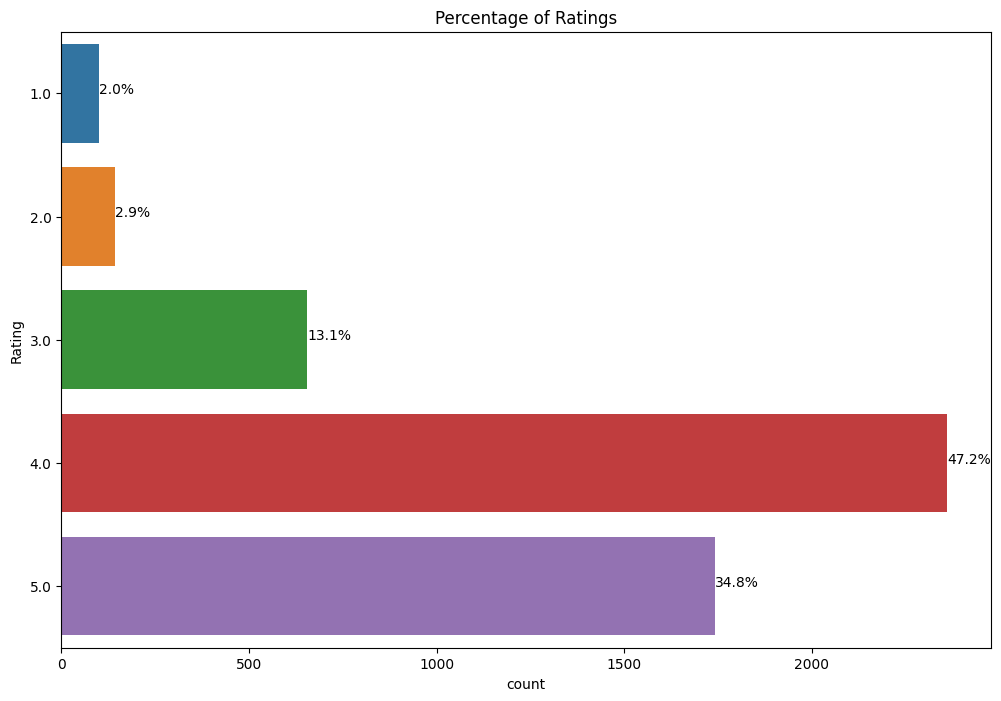

In [157]:
plt.figure(figsize=(12,8))
plt.title('Percentage of Ratings')
ax = sns.countplot(y = 'Rating', data = reviews)
total = len(reviews)
for p in ax.patches:
        percentage = '{:.1f}%'.format(100 * p.get_width()/total)
        x = p.get_x() + p.get_width() + 0.02
        y = p.get_y() + p.get_height()/2
        ax.annotate(percentage, (x, y))

In [158]:
data = df[['Review']]
data

,Review
0,I've purchased the 6GB version of this phone w...
1,I will try to keep this review short. This rev...
2,This review is after using this phone for 2 mo...
3,Battery is not upto the mark but due tofast ch...
4,Good
...,...
4995,Slow work mobile camera best battery slow
4996,"Bought in Great Indian sale, budget buy, very ..."
4997,I have been using this phone for about a week ...
4998,Automatically the dark mode comes on. The radi...


In [159]:
from nltk.corpus import stopwords
stop_words = stopwords.words('english')
data['Review'] = data['Review'].apply(lambda x: " ".join(x.lower() for x in str(x).split() \
                                    if x not in stop_words))

In [160]:
data

,Review
0,i've purchased 6gb version phone comes extenda...
1,i try keep review short. this review perspecti...
2,this review using phone 2 months.very nice pho...
3,battery upto mark due tofast charging hardly m...
4,good
...,...
4995,slow work mobile camera best battery slow
4996,"bought great indian sale, budget buy, good qua..."
4997,i using phone week totally impressed performan...
4998,automatically dark mode comes on. the radio ic...


In [161]:
lemmatizer = WordNetLemmatizer()
# Removing punctuation, making str to lower, applying Lemmatizer, Removing Stop words
corpus=[]
for i in tqdm_notebook(range(0, len(data))):
    cleaned= re.sub('[^a-zA-Z]', " ", data["Review"][i])
    cleaned= cleaned.lower()
    cleaned = cleaned.split()
    cleaned= [lemmatizer.lemmatize(word) for word in cleaned if word not in stopwords.words("english")]
    cleaned= ' '.join(cleaned)
    corpus.append(cleaned)

  0%|          | 0/5000 [00:00<?, ?it/s]

In [162]:
dataframe = pd.DataFrame({"Clean_Reviews": corpus,"Uncleaned_Reviews": df.Review})
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...
2,review using phone month nice phone budget ram...,This review is after using this phone for 2 mo...
3,battery upto mark due tofast charging hardly m...,Battery is not upto the mark but due tofast ch...
4,good,Good


In [163]:
def remove_pattern(text, pattern_regex):
    r = re.findall(pattern_regex, text)
    for i in r:
        text = re.sub(i, '', text)
    
    return text

In [164]:
dataframe['Clean_Reviews'] = np.vectorize(remove_pattern)(dataframe['Clean_Reviews'], "@[\w]*")
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...
2,review using phone month nice phone budget ram...,This review is after using this phone for 2 mo...
3,battery upto mark due tofast charging hardly m...,Battery is not upto the mark but due tofast ch...
4,good,Good
5,really nice phone used yet best camera phone k,Really nice phone which I have used yet. Best ...
6,good,Good
7,camera compatible valu,camera is not compatible is 19000 valu
8,camera quality good otherwise phone,Camera quality is good otherwise same as other...
9,using apps device starting heating,While using apps device is starting heating


In [165]:
cleaned_reviews = []

for index, row in dataframe.iterrows():
    # Here we are filtering out all the words that contains link
    words_without_links = [word for word in row.Clean_Reviews.split() if 'http' not in word]
    cleaned_reviews.append(' '.join(words_without_links))

dataframe['Clean_Reviews'] = cleaned_reviews
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...
2,review using phone month nice phone budget ram...,This review is after using this phone for 2 mo...
3,battery upto mark due tofast charging hardly m...,Battery is not upto the mark but due tofast ch...
4,good,Good
5,really nice phone used yet best camera phone k,Really nice phone which I have used yet. Best ...
6,good,Good
7,camera compatible valu,camera is not compatible is 19000 valu
8,camera quality good otherwise phone,Camera quality is good otherwise same as other...
9,using apps device starting heating,While using apps device is starting heating


In [166]:
dataframe = dataframe[dataframe['Clean_Reviews']!='']
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...
2,review using phone month nice phone budget ram...,This review is after using this phone for 2 mo...
3,battery upto mark due tofast charging hardly m...,Battery is not upto the mark but due tofast ch...
4,good,Good
5,really nice phone used yet best camera phone k,Really nice phone which I have used yet. Best ...
6,good,Good
7,camera compatible valu,camera is not compatible is 19000 valu
8,camera quality good otherwise phone,Camera quality is good otherwise same as other...
9,using apps device starting heating,While using apps device is starting heating


In [167]:
dataframe.drop_duplicates(subset=['Clean_Reviews'], keep=False)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...
2,review using phone month nice phone budget ram...,This review is after using this phone for 2 mo...
3,battery upto mark due tofast charging hardly m...,Battery is not upto the mark but due tofast ch...
4,good,Good
5,really nice phone used yet best camera phone k,Really nice phone which I have used yet. Best ...
6,good,Good
7,camera compatible valu,camera is not compatible is 19000 valu
8,camera quality good otherwise phone,Camera quality is good otherwise same as other...
9,using apps device starting heating,While using apps device is starting heating


In [168]:
dataframe = dataframe.reset_index(drop=True)
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...
2,review using phone month nice phone budget ram...,This review is after using this phone for 2 mo...
3,battery upto mark due tofast charging hardly m...,Battery is not upto the mark but due tofast ch...
4,good,Good
5,really nice phone used yet best camera phone k,Really nice phone which I have used yet. Best ...
6,good,Good
7,camera compatible valu,camera is not compatible is 19000 valu
8,camera quality good otherwise phone,Camera quality is good otherwise same as other...
9,using apps device starting heating,While using apps device is starting heating


In [169]:
def clean_text(text):
    '''Make text lowercase, remove text in square brackets,remove links,remove punctuation
    and remove words containing numbers.'''
    text = text.lower()
    text = re.sub('\[.*?\]', '', text)
    text = re.sub('https?://\S+|www\.\S+', '', text)
    text = re.sub('<.*?>+', '', text)
    text = re.sub('[%s]' % re.escape(string.punctuation), '', text)
    text = re.sub('\n', '', text)
    text = re.sub('\w*\d\w*', '', text)
    return text

In [170]:
dataframe['Clean_Reviews'] = dataframe['Clean_Reviews'].apply(lambda x: clean_text(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...
2,review using phone month nice phone budget ram...,This review is after using this phone for 2 mo...
3,battery upto mark due tofast charging hardly m...,Battery is not upto the mark but due tofast ch...
4,good,Good
5,really nice phone used yet best camera phone k,Really nice phone which I have used yet. Best ...
6,good,Good
7,camera compatible valu,camera is not compatible is 19000 valu
8,camera quality good otherwise phone,Camera quality is good otherwise same as other...
9,using apps device starting heating,While using apps device is starting heating


In [171]:
def remove_emoji(text):
    emoji_pattern = re.compile("["
                           u"\U0001F600-\U0001F64F"  # emoticons
                           u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                           u"\U0001F680-\U0001F6FF"  # transport & map symbols
                           u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                           u"\U00002702-\U000027B0"
                           u"\U000024C2-\U0001F251"
                           "]+", flags=re.UNICODE)
    return emoji_pattern.sub(r'', text)

In [172]:
dataframe['Clean_Reviews']=dataframe['Clean_Reviews'].apply(lambda x: remove_emoji(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...
2,review using phone month nice phone budget ram...,This review is after using this phone for 2 mo...
3,battery upto mark due tofast charging hardly m...,Battery is not upto the mark but due tofast ch...
4,good,Good
5,really nice phone used yet best camera phone k,Really nice phone which I have used yet. Best ...
6,good,Good
7,camera compatible valu,camera is not compatible is 19000 valu
8,camera quality good otherwise phone,Camera quality is good otherwise same as other...
9,using apps device starting heating,While using apps device is starting heating


In [173]:
dataframe['tokenized_tweets'] = dataframe['Clean_Reviews'].apply(lambda x: nltk.word_tokenize(x))
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews,tokenized_tweets
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...,"[purchased, gb, version, phone, come, extendab..."
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...,"[try, keep, review, short, review, perspective..."
2,review using phone month nice phone budget ram...,This review is after using this phone for 2 mo...,"[review, using, phone, month, nice, phone, bud..."
3,battery upto mark due tofast charging hardly m...,Battery is not upto the mark but due tofast ch...,"[battery, upto, mark, due, tofast, charging, h..."
4,good,Good,[good]
5,really nice phone used yet best camera phone k,Really nice phone which I have used yet. Best ...,"[really, nice, phone, used, yet, best, camera,..."
6,good,Good,[good]
7,camera compatible valu,camera is not compatible is 19000 valu,"[camera, compatible, valu]"
8,camera quality good otherwise phone,Camera quality is good otherwise same as other...,"[camera, quality, good, otherwise, phone]"
9,using apps device starting heating,While using apps device is starting heating,"[using, apps, device, starting, heating]"


In [174]:
dataframe.drop(['tokenized_tweets'],axis=1,inplace=True)

In [175]:
import codecs
with codecs.open("stop.txt", "r", encoding="ISO-8859-1") as s:
    stop = s.read()
    print(stop[:101])

a
a's
able
about
above
according
accordingly
across
actually
after
afterwards
again
again


In [176]:
stop.split(" ")

["a\r\na's\r\nable\r\nabout\r\nabove\r\naccording\r\naccordingly\r\nacross\r\nactually\r\nafter\r\nafterwards\r\nagain\r\nagainst\r\nain't\r\nall\r\nallow\r\nallows\r\nalmost\r\nalone\r\nalong\r\nalready\r\nalso\r\nalthough\r\nalways\r\nam\r\namong\r\namongst\r\nan\r\nand\r\nanother\r\nany\r\nanybody\r\nanyhow\r\nanyone\r\nanything\r\nanyway\r\nanyways\r\nanywhere\r\napart\r\nappear\r\nappreciate\r\nappropriate\r\nare\r\naren't\r\naround\r\nas\r\naside\r\nask\r\nasking\r\nassociated\r\nat\r\navailable\r\naway\r\nawfully\r\nb\r\nbe\r\nbecame\r\nbecause\r\nbecome\r\nbecomes\r\nbecoming\r\nbeen\r\nbefore\r\nbeforehand\r\nbehind\r\nbeing\r\nbelieve\r\nbelow\r\nbeside\r\nbesides\r\nbest\r\nbetter\r\nbetween\r\nbeyond\r\nboth\r\nbrief\r\nbut\r\nby\r\nc\r\nc'mon\r\nc's\r\ncame\r\ncan\r\ncan't\r\ncannot\r\ncant\r\ncause\r\ncauses\r\ncertain\r\ncertainly\r\nchanges\r\nclearly\r\nco\r\ncom\r\ncome\r\ncomes\r\nconcerning\r\nconsequently\r\nconsider\r\nconsidering\r\ncontain\r\ncontaining\r\nconta

In [177]:
from nltk.corpus import stopwords
my_stop_words=stopwords.words('english')
sw_list = [stop]
my_stop_words.extend(sw_list)
stopwords_set = set(my_stop_words)
cleaned_tweets = []

for index, row in dataframe.iterrows():
    
    # filerting out all the stopwords 
    words_without_stopwords = [word for word in row.Clean_Reviews.split() if not word in stopwords_set and '#' not in word.lower()]
    
    # finally creating tweets list of tuples containing stopwords(list) and sentimentType 
    cleaned_tweets.append(' '.join(words_without_stopwords))
    
dataframe['Clean_Reviews'] = cleaned_tweets
dataframe.head(10)

,Clean_Reviews,Uncleaned_Reviews
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...
2,review using phone month nice phone budget ram...,This review is after using this phone for 2 mo...
3,battery upto mark due tofast charging hardly m...,Battery is not upto the mark but due tofast ch...
4,good,Good
5,really nice phone used yet best camera phone k,Really nice phone which I have used yet. Best ...
6,good,Good
7,camera compatible valu,camera is not compatible is 19000 valu
8,camera quality good otherwise phone,Camera quality is good otherwise same as other...
9,using apps device starting heating,While using apps device is starting heating


In [178]:
TextBlob(dataframe['Clean_Reviews'][1]).words

WordList(['try', 'keep', 'review', 'short', 'review', 'perspective', 'average', 'user', 'believe', 'buy', 'phone', 'start', 'use', 'change', 'adjust', 'without', 'complaining', 'much', 'always', 'better', 'device', 'price', 'use', 'tool', 'nothing', 'much', 'pro', 'camera', 'pretty', 'good', 'con', 'software', 'sweet', 'little', 'feature', 'one', 'plus', 'make', 'sweet', 'negative', 'speed', 'power', 'run', 'apps', 'people', 'use', 'generally', 'without', 'issue', 'build', 'quality', 'good', 'well', 'given', 'going', 'use', 'sort', 'case', 'con', 'con', 'see', 'battery', 'need', 'charge', 'twice', 'day', 'browse', 'internet', 'use', 'camera', 'time', 'watch', 'youtube', 'instagram', 'facebook', 'medium', 'apps', 'like', 'hour', 'two', 'mid', 'brightness', 'maximum', 'achievable', 'screen', 'time', 'around', 'hour', 'given', 'high', 'speed', 'charger', 'battery', 'really', 'issue', 'tweaking', 'around', 'setting', 'delete', 'preinstalled', 'apps', 'stop', 'unnecessary', 'apps', 'backgro

In [179]:
tokenized_review = dataframe['Clean_Reviews'].apply(lambda x: x.split())
tokenized_review.head(10)

0    [purchased, gb, version, phone, come, extendab...
1    [try, keep, review, short, review, perspective...
2    [review, using, phone, month, nice, phone, bud...
3    [battery, upto, mark, due, tofast, charging, h...
4                                               [good]
5    [really, nice, phone, used, yet, best, camera,...
6                                               [good]
7                           [camera, compatible, valu]
8            [camera, quality, good, otherwise, phone]
9             [using, apps, device, starting, heating]
Name: Clean_Reviews, dtype: object

In [180]:
from nltk.stem.snowball import SnowballStemmer

# Use English stemmer.
stemmer = SnowballStemmer("english")

In [181]:
xx = pd.DataFrame()
xx['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([stemmer.stem(word) for word in x.split()]))
xx

,stemmed
0,purchas gb version phone come extend gb ram vi...
1,tri keep review short review perspect averag u...
2,review use phone month nice phone budget ram e...
3,batteri upto mark due tofast charg hard matter
4,good
...,...
4953,slow work mobil camera best batteri slow
4954,bought great indian sale budget buy good quali...
4955,use phone week total impress perform valu mone...
4956,automat dark mode come radio icon compass icon...


In [182]:
word_lemmatizer = WordNetLemmatizer()
nltk.download('omw-1.4')
yy=pd.DataFrame()
yy['stemmed'] = dataframe['Clean_Reviews'].apply(lambda x: " ".join([word_lemmatizer.lemmatize(i) for i in x.split()]))
yy

[nltk_data] Downloading package omw-1.4 to /root/nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!


,stemmed
0,purchased gb version phone come extendable gb ...
1,try keep review short review perspective avera...
2,review using phone month nice phone budget ram...
3,battery upto mark due tofast charging hardly m...
4,good
...,...
4953,slow work mobile camera best battery slow
4954,bought great indian sale budget buy good quali...
4955,using phone week totally impressed performance...
4956,automatically dark mode come radio icon compas...


In [183]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()
tweetscv=cv.fit_transform(dataframe.Clean_Reviews)


In [184]:
print(tweetscv.toarray()[100:200])

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [185]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/4958 [00:00<?, ?it/s]

In [186]:
corpus[3]

'batteri upto mark due tofast charg hardli matter'

In [187]:
## Applying Countvectorizer
# Creating the Bag of Words model
cv = CountVectorizer(max_features=5000,ngram_range=(1,3))
X = cv.fit_transform(corpus).toarray()

In [188]:
X.shape

(4958, 5000)

In [189]:
from nltk.corpus import stopwords
ps = PorterStemmer()
corpus = []
for i in tqdm_notebook(range(0, len(dataframe))):
    review = re.sub('[^a-zA-Z]', ' ', dataframe['Clean_Reviews'][i])
    review = review.lower()
    review = review.split()
    
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

  0%|          | 0/4958 [00:00<?, ?it/s]

In [190]:
corpus[4]

'good'

In [191]:
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [192]:
reviews=[review.strip() for review in dataframe.Clean_Reviews] # remove both the leading and the trailing characters
reviews=[comment for comment in reviews if comment] # removes empty strings, because they are considered in Python as False
# Joining the list into one string/text
reviews_text=' '.join(reviews)
reviews_text[0:1000]

'purchased gb version phone come extendable gb ram virtual memory capability good phone least expensive category offering one plus small evident point get noticed first thing confusing placement power button hence finger sensor daily handling mobile phone feel bit annoying finger locking un locking phone try handle place pocket although big problem still something think second point lag noticeable bit hoping might go away update improvement third point speaker volume speaker good near maximum level e volume seem creep steadily rather louds top volume limit fourth point final one camera shoot color realistic photo taken day light especially skin tone tend coloured led flash average could better good awesome part phone practicality daily user one plus strong brand part pricing offered battery life good charging capability also impressive someone like moved android phone build phone apt survive normal fall mishap happening phone feel solid hand stock android clean nothing complain overall

In [193]:
nlp=spacy.load('en_core_web_sm')

one_block=reviews_text[:1000]
doc_block=nlp(one_block)
spacy.displacy.render(doc_block,style='ent',jupyter=True)

In [194]:
for token in doc_block[:50]:
    print(token,token.pos_)

purchased VERB
gb PROPN
version NOUN
phone NOUN
come VERB
extendable ADJ
gb NOUN
ram VERB
virtual ADJ
memory NOUN
capability NOUN
good ADJ
phone NOUN
least ADJ
expensive ADJ
category NOUN
offering VERB
one NUM
plus CCONJ
small ADJ
evident ADJ
point NOUN
get AUX
noticed VERB
first ADJ
thing NOUN
confusing VERB
placement NOUN
power NOUN
button NOUN
hence ADV
finger PROPN
sensor NOUN
daily ADV
handling VERB
mobile ADJ
phone NOUN
feel NOUN
bit NOUN
annoying ADJ
finger NOUN
locking VERB
un PROPN
locking VERB
phone NOUN
try NOUN
handle VERB
place NOUN
pocket NOUN
although SCONJ


In [195]:
one_block=reviews_text
doc_block=nlp(one_block)
nouns_verbs=[token.text for token in doc_block if token.pos_ in ('NOUN','VERB')]
print(nouns_verbs[100:200])

['keep', 'review', 'review', 'perspective', 'user', 'believe', 'buy', 'phone', 'start', 'use', 'change', 'adjust', 'complaining', 'device', 'price', 'use', 'tool', 'camera', 'con', 'software', 'feature', 'make', 'speed', 'power', 'run', 'apps', 'people', 'use', 'issue', 'build', 'quality', 'given', 'going', 'use', 'sort', 'case', 'see', 'battery', 'need', 'charge', 'day', 'browse', 'internet', 'use', 'camera', 'time', 'watch', 'facebook', 'medium', 'apps', 'hour', 'brightness', 'screen', 'time', 'hour', 'given', 'speed', 'charger', 'battery', 'issue', 'tweaking', 'setting', 'delete', 'preinstalled', 'apps', 'stop', 'apps', 'background', 'achieve', 'hr', 'screen', 'time', 'peace', 'review', 'using', 'phone', 'month', 'phone', 'budget', 'superb', 'blaster', 'connectivity', 'superb', 'say', 'oneplus', 'recommend', 'oneplus', 'budget', 'buy', 'battery', 'upto', 'mark', 'tofast', 'charging', 'matter', 'phone', 'used', 'camera', 'phone', 'k']


In [196]:
from sklearn.feature_extraction.text import CountVectorizer
cv=CountVectorizer()

X=cv.fit_transform(nouns_verbs)
sum_words=X.sum(axis=0)

words_freq=[(word,sum_words[0,idx]) for word,idx in cv.vocabulary_.items()]
words_freq=sorted(words_freq, key=lambda x: x[1], reverse=True)

wd_df=pd.DataFrame(words_freq)
wd_df.columns=['word','count']
wd_df[0:10] # viewing top ten results

,word,count
0,phone,2364
1,camera,1557
2,battery,1003
3,quality,938
4,price,541
5,product,537
6,day,362
7,performance,342
8,issue,327
9,display,323


<Axes: title={'center': 'Top 10 nouns and verbs'}, xlabel='word'>

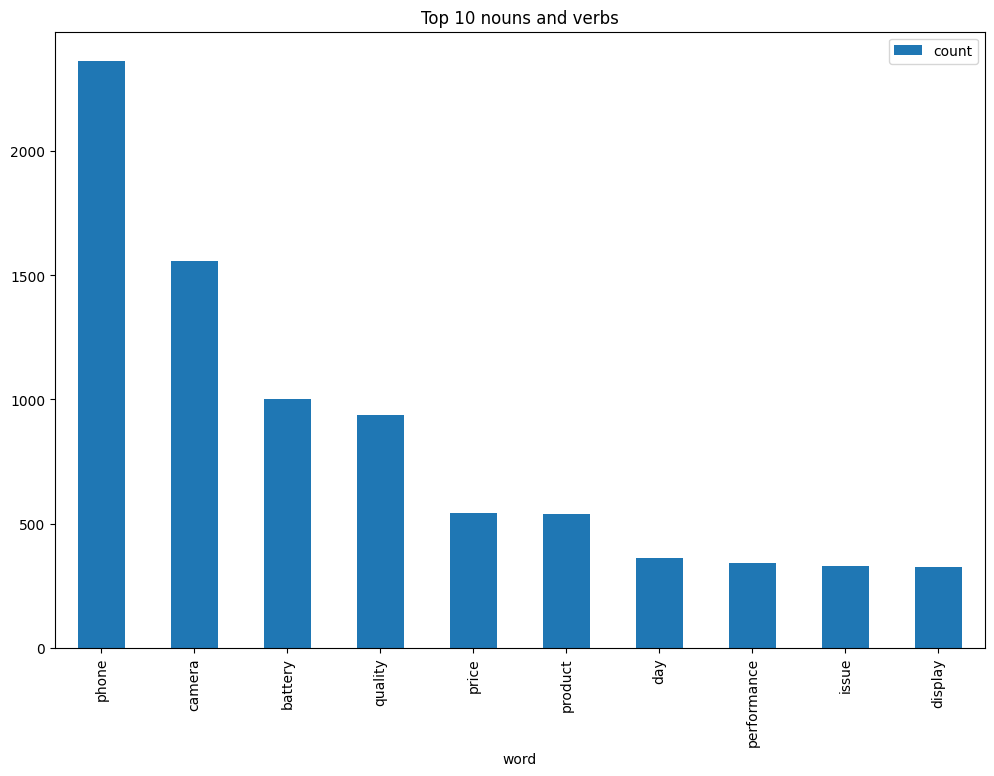

In [197]:
wd_df[0:10].plot.bar(x='word',figsize=(12,8),title='Top 10 nouns and verbs')

In [198]:
# BOW features
bow_word_vectorizer = CountVectorizer(max_df=0.90, min_df=2, stop_words='english')
# bag-of-words feature matrix
bow_word_feature = bow_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

# TF-IDF features
tfidf_word_vectorizer = TfidfVectorizer(max_df=0.90, min_df=2, stop_words='english')
# TF-IDF feature matrix
tfidf_word_feature = tfidf_word_vectorizer.fit_transform(dataframe['Clean_Reviews'])

In [199]:
# 1 way
def fetch_sentiment_using_SIA(text):
    sid = SentimentIntensityAnalyzer()
    polarity_scores = sid.polarity_scores(text)
    return 'neg' if polarity_scores['neg'] > polarity_scores['pos'] else 'pos'

# 2 way
def fetch_sentiment_using_textblob(text):
    analysis = TextBlob(text)
    return 'pos' if analysis.sentiment.polarity >= 0 else 'neg'

In [200]:
sentiments_using_SIA = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_SIA(tweet))
pd.DataFrame(sentiments_using_SIA.value_counts())

,Clean_Reviews
pos,4538
neg,420


In [201]:
dataframe.Clean_Reviews[8]

'camera quality good otherwise phone'

In [202]:
sid = SentimentIntensityAnalyzer()
sid.polarity_scores(dataframe.Clean_Reviews[8])

{'neg': 0.0, 'neu': 0.58, 'pos': 0.42, 'compound': 0.4404}

In [203]:
df=pd.DataFrame()
df['Review'] = dataframe.Clean_Reviews
df['scores'] = dataframe['Clean_Reviews'].apply(lambda review: sid.polarity_scores(review))
df.head()

,Review,scores
0,purchased gb version phone come extendable gb ...,"{'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co..."
1,try keep review short review perspective avera...,"{'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'co..."
2,review using phone month nice phone budget ram...,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp..."
3,battery upto mark due tofast charging hardly m...,"{'neg': 0.146, 'neu': 0.854, 'pos': 0.0, 'comp..."
4,good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound..."


In [204]:
df['compound']  = df['scores'].apply(lambda scores: scores['compound'])
df.head()

,Review,scores,compound
0,purchased gb version phone come extendable gb ...,"{'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co...",0.9876
1,try keep review short review perspective avera...,"{'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'co...",0.9776
2,review using phone month nice phone budget ram...,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...",0.9260
3,battery upto mark due tofast charging hardly m...,"{'neg': 0.146, 'neu': 0.854, 'pos': 0.0, 'comp...",-0.0498
4,good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404


In [205]:
df['sentiment'] = df['compound'].apply(lambda c: 'Positive' if c >=0.05 else ('Negative' if c<=-0.05  else 'Neutral'))
df

,Review,scores,compound,sentiment
0,purchased gb version phone come extendable gb ...,"{'neg': 0.069, 'neu': 0.684, 'pos': 0.247, 'co...",0.9876,Positive
1,try keep review short review perspective avera...,"{'neg': 0.043, 'neu': 0.704, 'pos': 0.253, 'co...",0.9776,Positive
2,review using phone month nice phone budget ram...,"{'neg': 0.0, 'neu': 0.667, 'pos': 0.333, 'comp...",0.9260,Positive
3,battery upto mark due tofast charging hardly m...,"{'neg': 0.146, 'neu': 0.854, 'pos': 0.0, 'comp...",-0.0498,Neutral
4,good,"{'neg': 0.0, 'neu': 0.0, 'pos': 1.0, 'compound...",0.4404,Positive
...,...,...,...,...
4953,slow work mobile camera best battery slow,"{'neg': 0.0, 'neu': 0.588, 'pos': 0.412, 'comp...",0.6369,Positive
4954,bought great indian sale budget buy good quali...,"{'neg': 0.0, 'neu': 0.558, 'pos': 0.442, 'comp...",0.8591,Positive
4955,using phone week totally impressed performance...,"{'neg': 0.0, 'neu': 0.655, 'pos': 0.345, 'comp...",0.9129,Positive
4956,automatically dark mode come radio icon compas...,"{'neg': 0.0, 'neu': 1.0, 'pos': 0.0, 'compound...",0.0000,Neutral


In [206]:
from collections import defaultdict
from plotly import tools
from plotly.offline import iplot
#Filtering data
positive_review = df[df["sentiment"]=='Positive'].dropna()
neutral_review = df[df["sentiment"]=='Neutral'].dropna()
negative_review = df[df["sentiment"]=='Negative'].dropna()

## custom function for ngram generation ##
def generate_ngrams(text, n_gram = 1):
    token = [token for token in text.lower().split(" ") if token != "" if token not in STOPWORDS]
    ngrams = zip(*[token[i:] for i in range(n_gram)])
    return [" ".join(ngram) for ngram in ngrams]

# custom function for horizontal bar chart ##
def horizontal_bar_chart(df, color):
    trace = go.Bar(
        y =df["word"].values[::-1],
        x = df["wordcount"].values[::-1],
        showlegend = False,
        orientation = 'h',
        marker = dict(
            color = color,
        ),
    )
    return trace
## Get the bar chart from positive reviews ##
freq_dict = defaultdict(int)
for sent in positive_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace0 = horizontal_bar_chart(fd_sorted.head(20), 'blue')


## Get the bar chart from neutral reviews ##
freq_dict = defaultdict(int)
for sent in neutral_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace1 = horizontal_bar_chart(fd_sorted.head(20), 'purple')

## Get the bar chart from negative reviews ##
freq_dict = defaultdict(int)
for sent in negative_review["Review"]:
    for word in generate_ngrams(sent):
        freq_dict[word] += 1
fd_sorted = pd.DataFrame(sorted(freq_dict.items(), key=lambda x: x[1])[::-1])
fd_sorted.columns = ["word", "wordcount"]
trace2 = horizontal_bar_chart(fd_sorted.head(20), 'yellow')

# Creating two subplots
fig = tools.make_subplots(rows=3, cols=1, vertical_spacing = 0.04,
                          subplot_titles=["Frequent words of positive reviews", "Frequent words of neutral reviews",
                                          "Frequent words of negative reviews"])
fig.append_trace(trace0, 1, 1)
fig.append_trace(trace1, 2, 1)
fig.append_trace(trace2, 3, 1)
fig['layout'].update(height=1200, width=900, paper_bgcolor='rgb(233,233,233)', title="Word Count Plots")
iplot(fig, filename='word-plots')

<Axes: xlabel='sentiment', ylabel='count'>

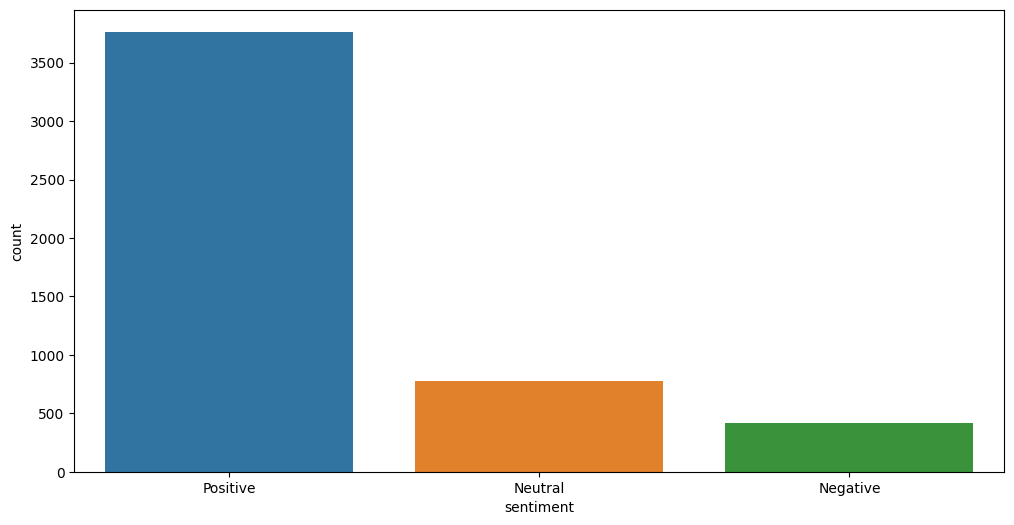

In [207]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

<Axes: xlabel='sentiment', ylabel='count'>

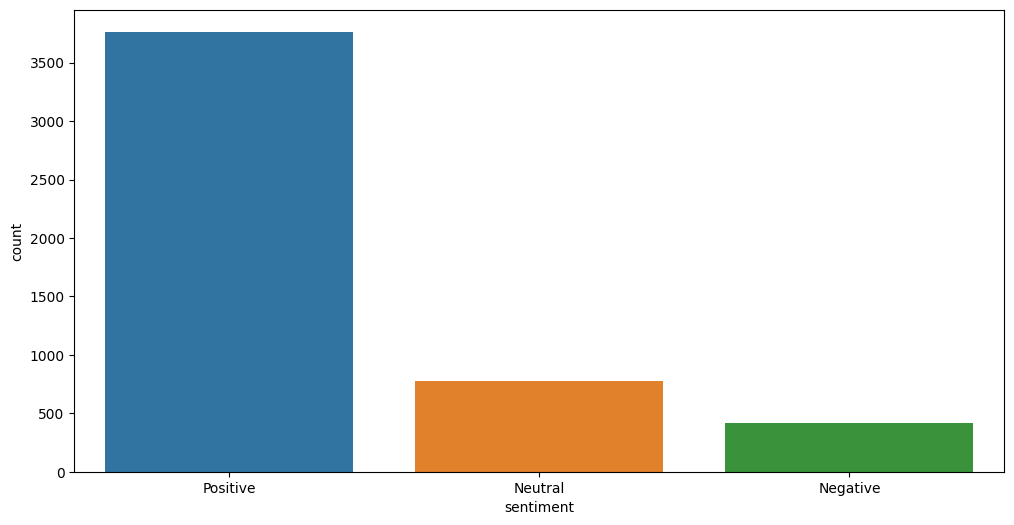

In [208]:
plt.figure(figsize=(12,6))
sns.countplot(x='sentiment',data=df)

In [209]:
sentiments_using_textblob = dataframe.Clean_Reviews.apply(lambda tweet: fetch_sentiment_using_textblob(tweet))
pd.DataFrame(sentiments_using_textblob.value_counts())

,Clean_Reviews
pos,4610
neg,348


In [210]:
def calc_subj(text):
    return TextBlob(text).sentiment.subjectivity
 
# function for Polarity
def calc_pola(text):
    return TextBlob(text).sentiment.polarity
 
dataframe['Subjectivity'] = dataframe.Clean_Reviews.apply(calc_subj)
dataframe['Polarity'] = dataframe.Clean_Reviews.apply(calc_pola)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...,0.486111,0.180556
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...,0.498519,0.169769
2,review using phone month nice phone budget ram...,This review is after using this phone for 2 mo...,0.875000,0.603125
3,battery upto mark due tofast charging hardly m...,Battery is not upto the mark but due tofast ch...,0.458333,-0.208333
4,good,Good,0.600000,0.700000


Text(0, 0.5, 'Subjectivity')

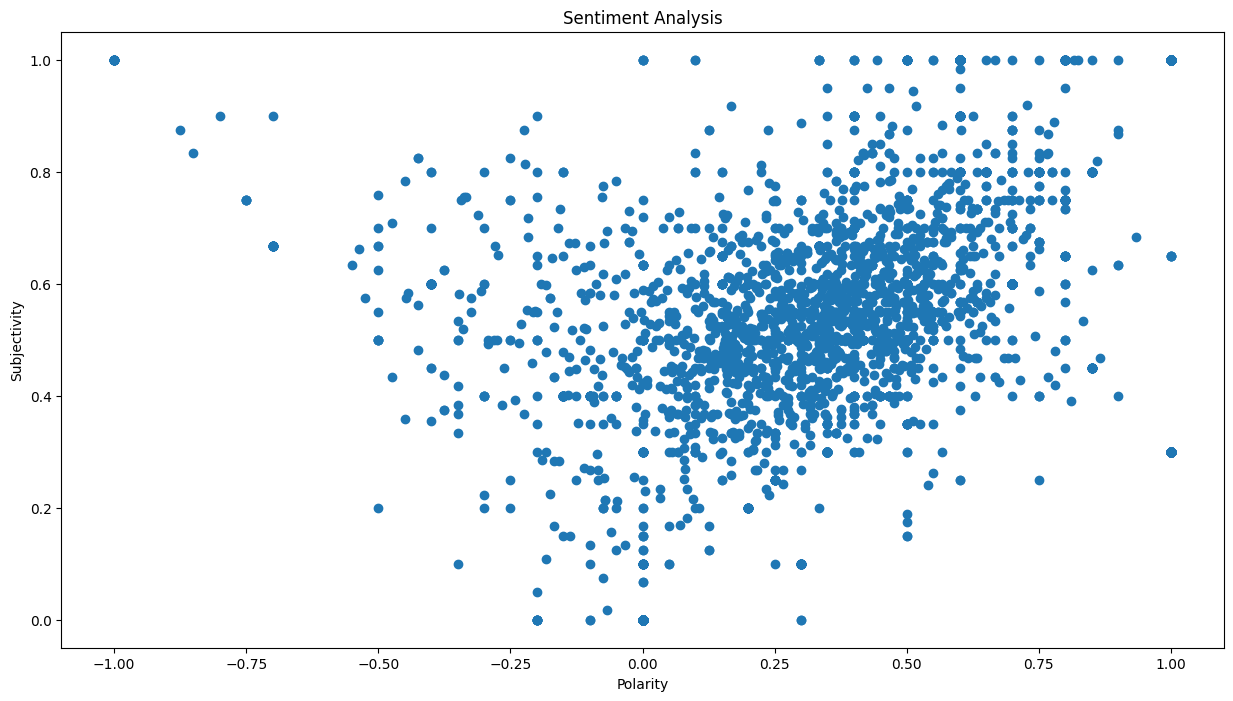

In [211]:
f, axes = plt.subplots(figsize = (15,8))
plt.scatter(dataframe.Polarity, dataframe.Subjectivity)
plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

In [212]:
dataframe['sentiment'] = sentiments_using_SIA
dataframe.to_csv("clean_review.csv",index=False)
dataframe.head()

,Clean_Reviews,Uncleaned_Reviews,Subjectivity,Polarity,sentiment
0,purchased gb version phone come extendable gb ...,I've purchased the 6GB version of this phone w...,0.486111,0.180556,pos
1,try keep review short review perspective avera...,I will try to keep this review short. This rev...,0.498519,0.169769,pos
2,review using phone month nice phone budget ram...,This review is after using this phone for 2 mo...,0.875000,0.603125,pos
3,battery upto mark due tofast charging hardly m...,Battery is not upto the mark but due tofast ch...,0.458333,-0.208333,neg
4,good,Good,0.600000,0.700000,pos


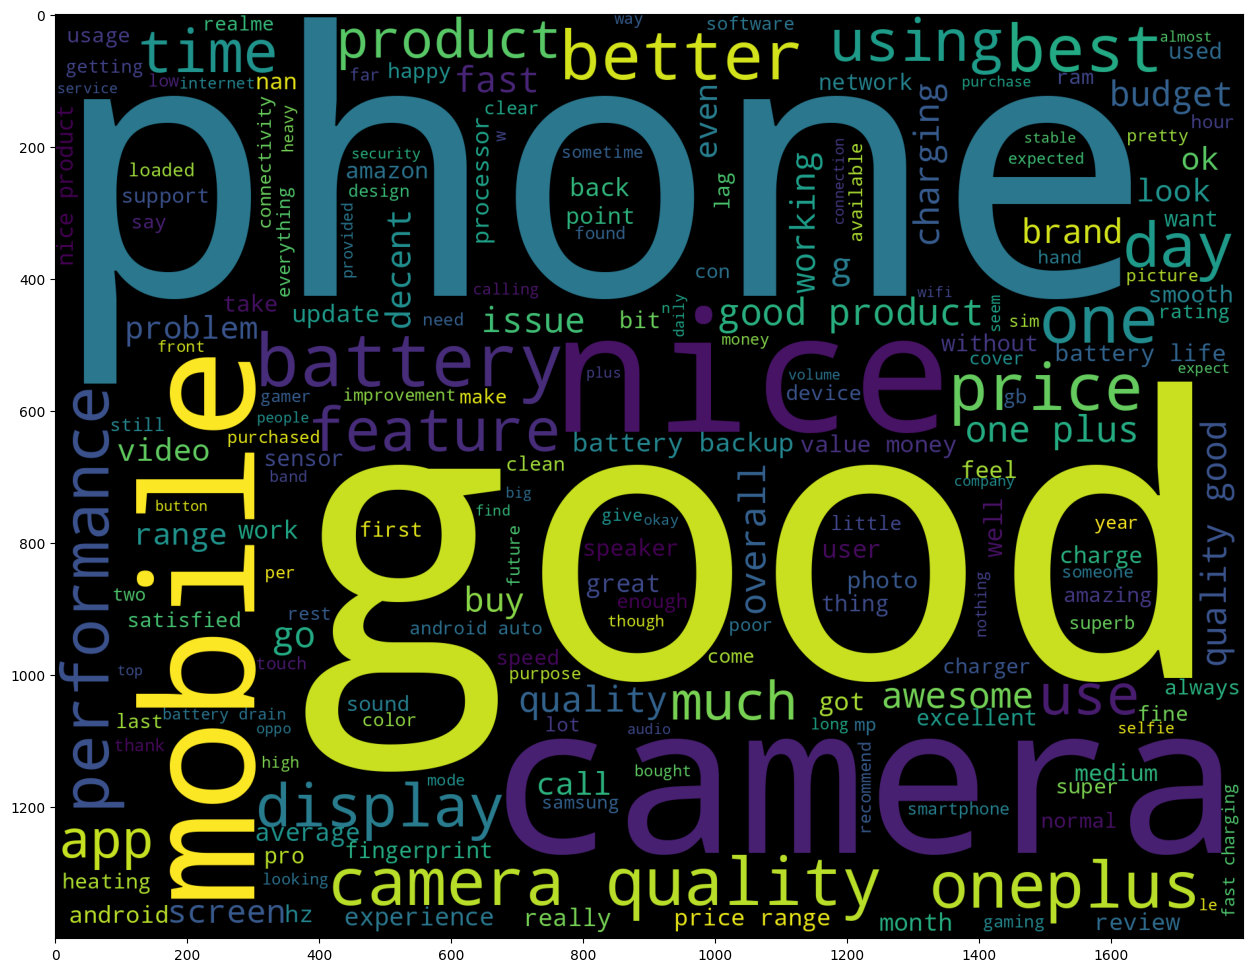

In [213]:
allWords_ = ' '.join([review for review in dataframe[:500]['Clean_Reviews']])
f, axes = plt.subplots(figsize=(20,12))
wordcloud= WordCloud(
        background_color = 'black',
        width = 1800,
        height =1400).generate(allWords_)
plt.imshow(wordcloud)

In [214]:
def generate_wordcloud(all_words):
    wordcloud = WordCloud(width=800, height=500, random_state=21, max_font_size=100, relative_scaling=0.5, colormap='Dark2').generate(all_words)

    plt.figure(figsize=(14, 10))
    plt.imshow(wordcloud, interpolation="bilinear")
    plt.axis('off')
    plt.show()

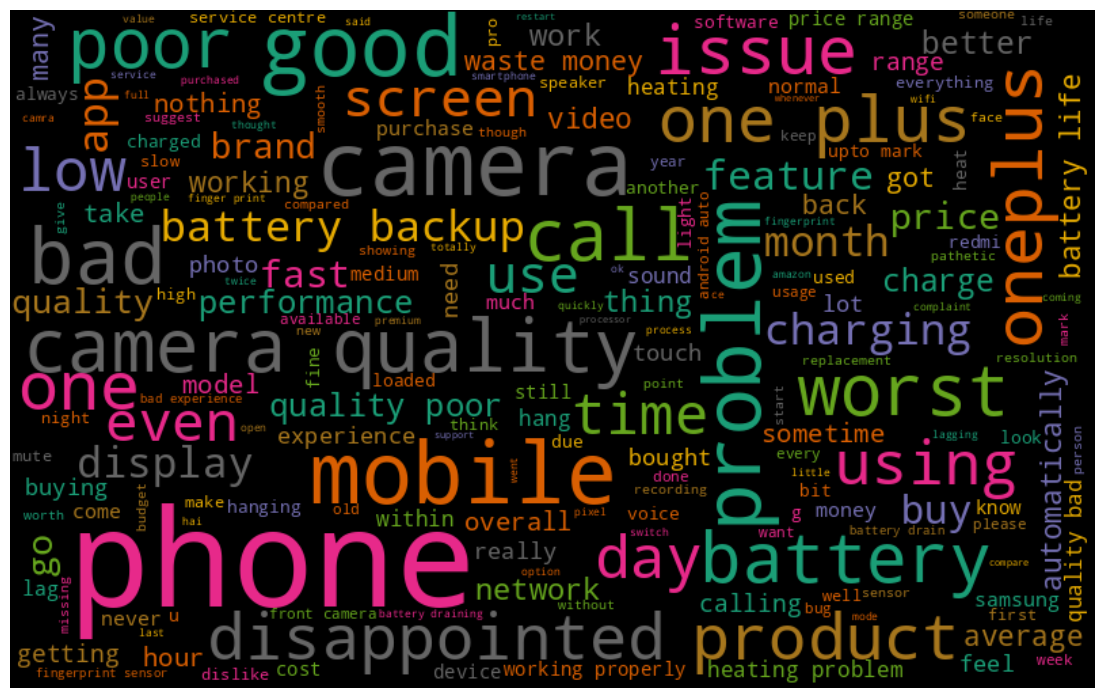

In [215]:
all_words = ' '.join([text for text in dataframe['Clean_Reviews'][dataframe.sentiment == 'neg']])
generate_wordcloud(all_words)